Problema de admision de alumnos a la universidad

Supongamos que eres el administrador de un departamento universitario y quieres determinar la probabilidad de admisión de cada solicitante en función de sus resultados en dos exámenes.

    Tienes datos históricos de solicitantes anteriores que puedes usar como conjunto de entrenamiento para la regresión logística.
    Para cada ejemplo de entrenamiento, cuentas con las calificaciones del solicitante en dos exámenes y la decisión de admisión.
    Tu tarea es construir un modelo de clasificación que estime la probabilidad de admisión de un solicitante en función de sus puntuaciones en esos dos exámenes

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [6]:
#Leer el archivo CSV

data_x = np.loadtxt("C:/Users/HUAWEI/Desktop/IA/datos_x.csv", delimiter=",")
data_y = np.loadtxt("C:/Users/HUAWEI/Desktop/IA/datos_y.csv", delimiter=",")

In [7]:
x_init = data_x
y_init = data_y
m, n = x_init.shape
w_init = np.zeros(n)
b_init = 0

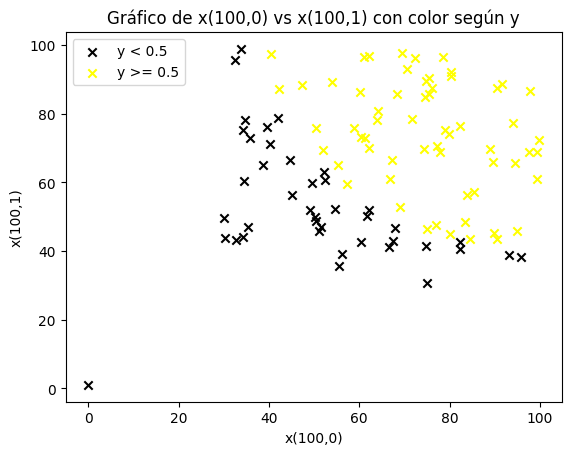

In [8]:
# Definir el umbral para la clasificación (puedes ajustarlo)
umbral = 0.5

# Filtrar los puntos según el valor de y
x_class0 = data_x[data_y < umbral]  # Puntos donde y < umbral (azul)
x_class1 = data_x[data_y >= umbral] # Puntos donde y >= umbral (rojo)

# Graficar puntos con diferente color según y
plt.scatter(x_class0[:, 0], x_class0[:, 1], marker='x', color='black', label=f"y < {umbral}")
plt.scatter(x_class1[:, 0], x_class1[:, 1], marker='x', color='yellow', label=f"y >= {umbral}")

# Etiquetas y leyenda
plt.xlabel("x(100,0)")
plt.ylabel("x(100,1)")
plt.title("Gráfico de x(100,0) vs x(100,1) con color según y")
plt.legend()
plt.show()

In [9]:
def sigmoide(x, y, w, b):
    fwb = np.dot(x, w) + b
    z = 1 / (1 + np.exp(-fwb))
    return z

In [10]:
sig = sigmoide(x_init, y_init, w_init, b_init)
print(sig)

[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]


In [20]:
def cal_cost(x, y, w, b):
    m, n = x.shape
    costo = 0
    for i in range(m):
        fwb = np.dot(x[i], w) + b
        g = 1 / (1 + np.exp(-fwb))
        costo = costo - (y[i] * np.log(g) + (1 - y[i]) * np.log(g))
    costo = costo * (1 / m)
    return costo

In [21]:
def descenso_gradiente(x, y, w, b, alpha, iters):
    m, n = x.shape
    for k in range(iters):
        J = cal_cost(x, y, w, b)
        if k% math.ceil(iters / 10) == 0:
            print("Iteracion: {} Costo: {}".format(k, J))
        if J < 0.01:
            break
        dw = np.zeros((n,))
        db = 0.0
        for i in range(m):
            fwb = np.dot(x[i], w) + b
            g = 1 / (1 + np.exp(-fwb))
            y_aprox = (g - y[i])
            for j in range(n):
                dw[j] = dw[j] + y_aprox * x[i, j]
            db = db + y_aprox
        w = w - alpha * dw / m
        b = b - alpha * db / m
    return w, b

In [22]:
w_init = 0.01 * (np.random.rand(2) - 0.5)
b_init = -8
w_fin, b_fin = descenso_gradiente(x_init, y_init, w_init, b_init, 0.001, 10000)

Iteracion: 0 Costo: 7.996568206977198
Iteracion: 1000 Costo: 0.7422643636897678
Iteracion: 2000 Costo: 0.743307731977365
Iteracion: 3000 Costo: 0.7443483007099585
Iteracion: 4000 Costo: 0.7453860840721634
Iteracion: 5000 Costo: 0.746421096156521
Iteracion: 6000 Costo: 0.7474533509639794
Iteracion: 7000 Costo: 0.7484828624043917
Iteracion: 8000 Costo: 0.7495096442970102
Iteracion: 9000 Costo: 0.7505337103709782


In [15]:
w_fin

array([0.0712392 , 0.06481427])

In [16]:
b_init

-8